In [11]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

df = pd.read_csv(os.path.join("data", "NFLX.csv"))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-08,143.570007,145.070007,142.559998,144.740005,144.740005,6887100
1,2017-02-09,144.979996,145.089996,143.580002,144.139999,144.139999,4555100
2,2017-02-10,144.679993,145.300003,143.970001,144.820007,144.820007,6171900
3,2017-02-13,145.190002,145.949997,143.050003,143.199997,143.199997,4790400
4,2017-02-14,143.199997,144.110001,140.050003,140.820007,140.820007,8367800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [13]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df_sort = df.sort_values(by='Date', ascending=True)

In [16]:
df_sort.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-08,143.570007,145.070007,142.559998,144.740005,144.740005,6887100
1,2017-02-09,144.979996,145.089996,143.580002,144.139999,144.139999,4555100
2,2017-02-10,144.679993,145.300003,143.970001,144.820007,144.820007,6171900
3,2017-02-13,145.190002,145.949997,143.050003,143.199997,143.199997,4790400
4,2017-02-14,143.199997,144.110001,140.050003,140.820007,140.820007,8367800


In [17]:
df_sort = df.sort_values(by='Date', ascending=True)

In [18]:
df_sort.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-08,143.570007,145.070007,142.559998,144.740005,144.740005,6887100
1,2017-02-09,144.979996,145.089996,143.580002,144.139999,144.139999,4555100
2,2017-02-10,144.679993,145.300003,143.970001,144.820007,144.820007,6171900
3,2017-02-13,145.190002,145.949997,143.050003,143.199997,143.199997,4790400
4,2017-02-14,143.199997,144.110001,140.050003,140.820007,140.820007,8367800


In [20]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.7 KB


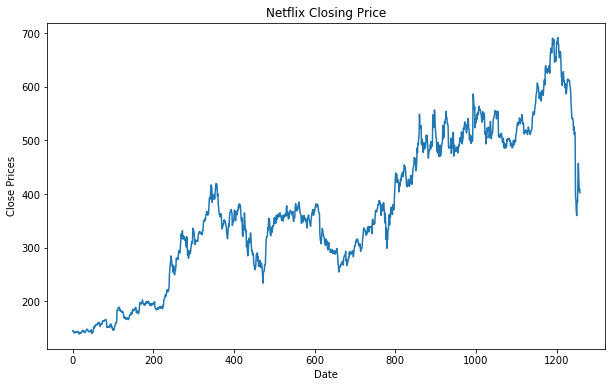

In [21]:
#plot close price
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_sort['Close'])
plt.title('Netflix Closing Price')
plt.show()